# Příspěvky na transparentním účtu Lidé PRO

- základní statistiky a grafy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
sns.set_theme(style="darkgrid", palette="colorblind", font_scale=1.1, rc={'figure.figsize':(16,8)})

## Načtení dat

- načte všechny transakce z transparentního účtu
  - aktuálně je definováno rozmezí 20.10.2020 (pár dní před prvními příspěvky) až 31.12.2020
- pročistí data pro účely dalších výpočtů

In [2]:
[ sumy, tx ] = pd.read_html("https://ib.fio.cz/ib/transparent?a=20308993&f=20.10.2020&t=31.12.2020")
sumy

,Stav k: 20.10.2020,Stav k: 12.12.2020,Suma příjmů,Suma výdajů,Suma celkem,Běžný zůstatek
0,"0,00 CZK","1 017 743,89 CZK","1 227 764,89 CZK","-210 021,00 CZK","1 017 743,89 CZK","1 017 743,89 CZK"


In [3]:
# reverse order and replace NaNs
tx = tx.iloc[::-1].fillna('')
# set Datum as index
tx.index = pd.to_datetime(tx['Datum'], dayfirst=True)
tx = tx.drop(columns=["Datum"])
# convert Částka to float
tx['Částka'] = tx['Částka'].str.replace(",", ".").str.replace(r"[^0-9.\-]", "").astype(float)
# exclude negative values (i.e. expenses)
tx = tx[tx['Částka'] > 0]
tx

,Částka,Typ,Název protiúčtu,Zpráva pro příjemce,KS,VS,SS,Poznámka
Datum,,,,,,,,
2020-10-23,2021.0,Platba převodem uvnitř banky,"Minář, Mikuláš","Dar - PRO šťastnou plavbu, PRO lepší ČR.",,,,"Dar - PRO šťastnou plavbu, PRO lepší ČR."
2020-10-23,2021.0,Okamžitá příchozí platba,Ženatá Kamila,,0,,,Ženatá Kamila
2020-10-23,200.0,Okamžitá příchozí platba,Baloun Marek,Ať se daří,0,,,Baloun Marek
2020-10-23,666.0,Platba převodem uvnitř banky,"Beneš, Tomáš",Pravidelny prispevek Ceske cirkve satanisicke,,,,Pravidelny prispevek Ceske cirkve satanisicke
2020-10-23,1111.0,Platba převodem uvnitř banky,"Bulant, Vladislav",,,,,
...,...,...,...,...,...,...,...,...
2020-12-11,2500.0,Okamžitá příchozí platba,IVANA JURENKOVÁ,Babišuv uplatek,,,,IVANA JURENKOVÁ
2020-12-11,500.0,Bezhotovostní příjem,KATERINA TRESNAKOVA,PŘEVOD PROSTŘEDKŮ,,322368,,KATERINA TRESNAKOVA
2020-12-11,500.0,Okamžitá příchozí platba,"Peterka Aleš,Ing.",,0,13313,,"Peterka Aleš,Ing."


## Základní statistiky

- počet, průměr, směrodatná odchylka, minimum, maximum, kvantily
- kvantil *50%* je medián

In [4]:
tx.describe()

,Částka
count,561.000000
mean,2188.529216
std,14499.852937
min,0.010000
25%,300.000000
50%,500.000000
75%,1000.000000
max,297059.450000


## Výše příspěvků v jednotlivé dny

<AxesSubplot:xlabel='Datum'>

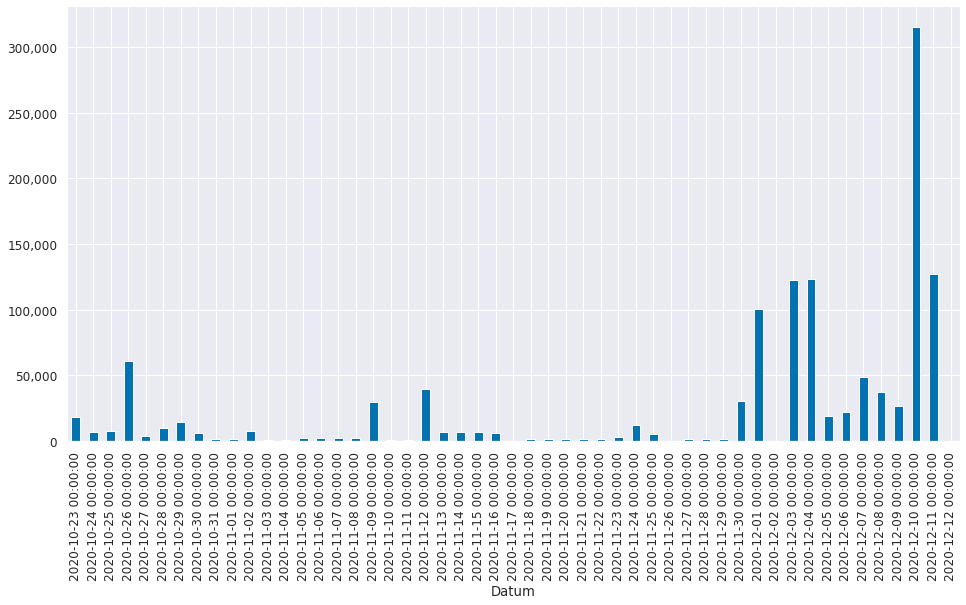

In [5]:
# contributions by days
cbd = tx['Částka'].groupby('Datum').sum().resample("1d").pad()

plt.ticklabel_format(style = 'plain')
ax = plt.gca()
ax.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

cbd.plot(kind='bar', ax=ax)

## Celková suma příspěvků v čase

<AxesSubplot:xlabel='Datum'>

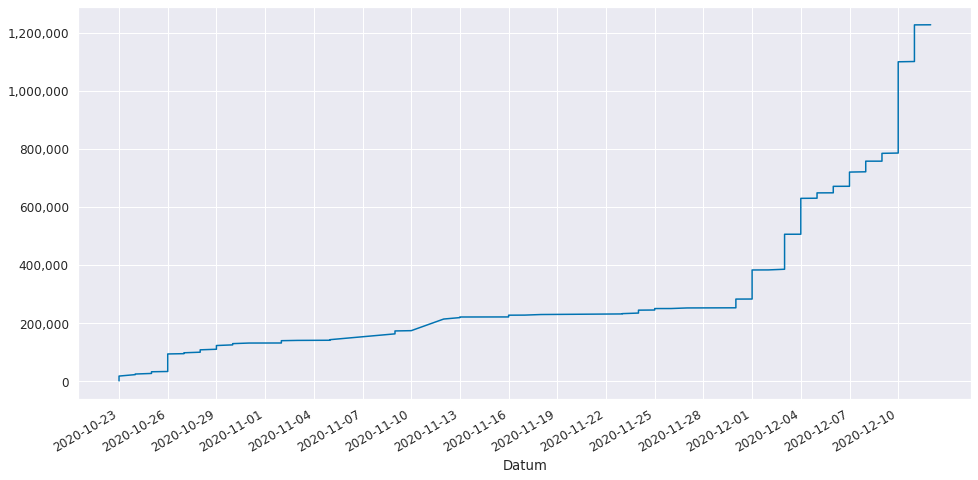

In [6]:
f = plt.figure()
plt.ticklabel_format(style = 'plain')
ax = plt.gca()
ax.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

tx['Částka'].cumsum().plot(ax=ax, xticks=cbd.index[::3])

## Nejčetnější výše příspěvků

- jakými částkami přispívají lidé nejčastěji

In [7]:
# amount frequencies
amf = tx.value_counts(['Částka']).to_frame(name='Četnost')
amf['% Příspěvků'] = (100 * amf['Četnost'] / amf['Četnost'].sum()).round(2)
amf['% Vybraného'] = (100 * amf.index.get_level_values(0) * amf['Četnost'] / (amf.index.get_level_values(0) * amf['Četnost']).sum()).round(2)
amf.sort_values(by=['Četnost','% Vybraného'], ascending=False)[:10]

,Četnost,% Příspěvků,% Vybraného
Částka,,,
1000.00,159,28.34,12.95
500.00,142,25.31,5.78
2021.00,52,9.27,8.56
200.00,43,7.66,0.70
100.00,33,5.88,0.27
300.00,19,3.39,0.46
0.01,19,3.39,0.00
5000.00,16,2.85,6.52
250.00,12,2.14,0.24


## Nejvýznamnější výše příspěvků

* které výše přispěvku přispívají nejvíc k celkové sumě

In [8]:
amf.sort_values(by='% Vybraného', ascending=False)[:10]

,Četnost,% Příspěvků,% Vybraného
Částka,,,
297059.45,1,0.18,24.20
1000.00,159,28.34,12.95
120792.51,1,0.18,9.84
2021.00,52,9.27,8.56
100000.00,1,0.18,8.14
5000.00,16,2.85,6.52
500.00,142,25.31,5.78
20000.00,3,0.53,4.89
10000.00,5,0.89,4.07
